In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading data sets 
file_path='C:/Users/NanduCn/jupter1/gnapack'
fullfm=pd.read_csv(os.path.join(file_path,'fulfilment_center_info.csv'))
meal_info=pd.read_csv(os.path.join(file_path,'meal_info.csv'))
train=pd.read_csv(os.path.join(file_path,'train.csv'))

test=pd.read_csv(os.path.join(file_path,'test_QoiMO9B.csv'))



# EDA

In [3]:
#shapes of train dataset

print(train.shape)

train.head()


(456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
#shapes of fulfilment_center_info
print(fullfm.shape)
fullfm.head()

(77, 5)


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


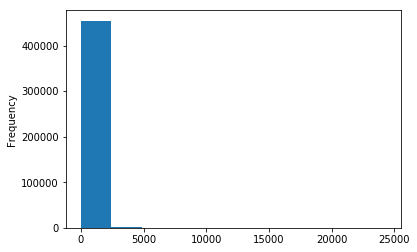

In [5]:
train.num_orders.plot.hist()

In [6]:
#shape of meal_info
print(meal_info.shape)
meal_info.head()
               

(51, 3)


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
train.describe()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


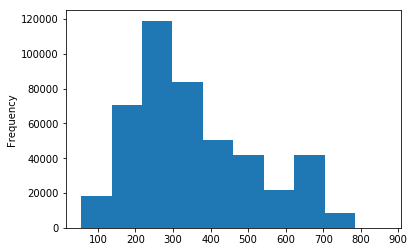

In [8]:
#train base price distribution
train.base_price.plot.hist()

In [9]:

#shapes of test dataset
print(test.shape)
test.head()

(32573, 8)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


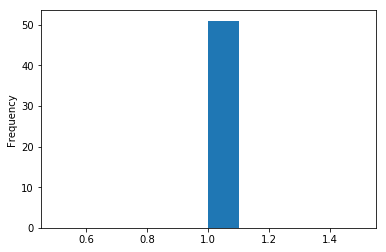

In [10]:
# total number of meal_id data  
meal_info.meal_id.value_counts().plot.hist()

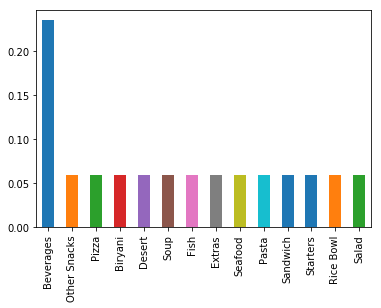

In [11]:
# different types of catgory data 
meal_info.category.value_counts(normalize=True).plot.bar()

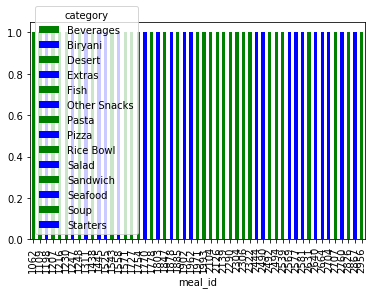

In [12]:
#category  food types
temp1 = pd.crosstab(meal_info['meal_id'], meal_info['category'])
temp1.plot(kind='bar', stacked=True, color=['green','blue'], grid=False)

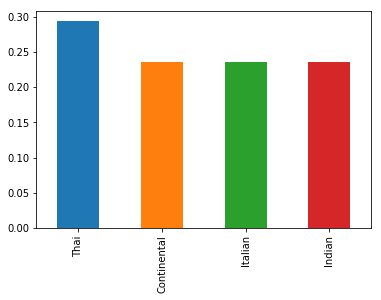

In [13]:
#cuisine types 
meal_info.cuisine.value_counts(normalize=True).plot.bar()

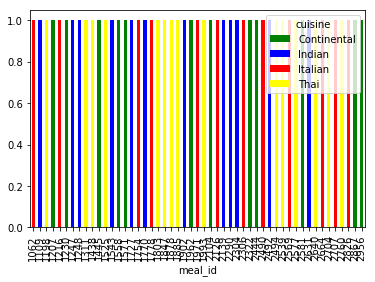

In [14]:
#based on meal_id no.of cuisine interested
temp2 = pd.crosstab(meal_info['meal_id'], meal_info['cuisine'])
temp2.plot(kind='bar', stacked=True, color=['green','blue','red','yellow'], grid=False)

In [15]:
#  interested in based on  food  category
temp = meal_info[['meal_id','category','cuisine']].groupby('category').count().rename(columns
                                                                                 ={'meal_id':'meal_id'}).reset_index()

temp

,category,meal_id,cuisine
0,Beverages,12,12
1,Biryani,3,3
2,Desert,3,3
3,Extras,3,3
4,Fish,3,3
5,Other Snacks,3,3
6,Pasta,3,3
7,Pizza,3,3
8,Rice Bowl,3,3
9,Salad,3,3


In [16]:
#  interested in based on cuisine   
temp1 = meal_info[['meal_id','cuisine']].groupby('cuisine').agg('count').rename(columns
                                                                                 ={'meal_id':'interested_in _cuisine'}).reset_index()

In [17]:
temp1

,cuisine,interested_in _cuisine
0,Continental,12
1,Indian,12
2,Italian,12
3,Thai,15


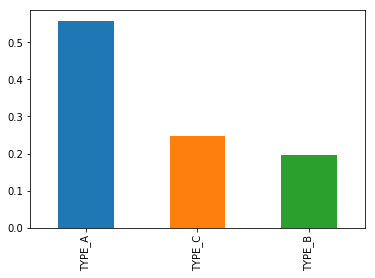

In [18]:
# based on fullficenter type distribution
fullfm.center_type.value_counts(normalize=True).plot.bar()



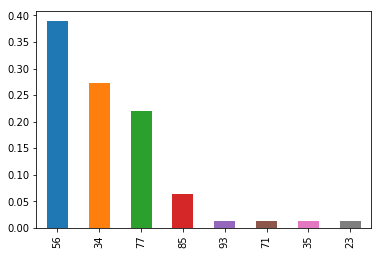

In [19]:
# region_code types
fullfm.region_code.value_counts(normalize=True).plot.bar()


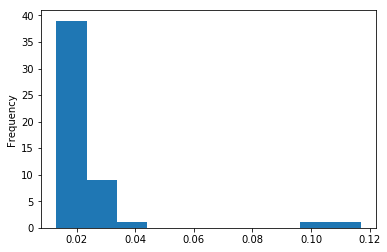

In [20]:
# city_code hightest percentages 
fullfm.city_code.value_counts(normalize=True).plot.hist()

In [21]:
t = meal_info[['meal_id','category','cuisine']].groupby('category').agg('count').reset_index()


In [22]:
t

,category,meal_id,cuisine
0,Beverages,12,12
1,Biryani,3,3
2,Desert,3,3
3,Extras,3,3
4,Fish,3,3
5,Other Snacks,3,3
6,Pasta,3,3
7,Pizza,3,3
8,Rice Bowl,3,3
9,Salad,3,3


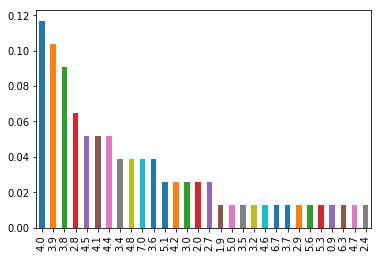

In [24]:
fullfm.op_area.value_counts(normalize=True).plot.bar()

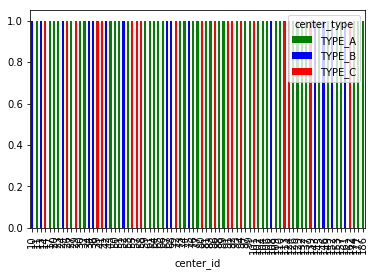

In [25]:
g = pd.crosstab(fullfm['center_id'], fullfm['center_type'])
g.plot(kind='bar', stacked=True, color=['green','blue','red'], grid=False)

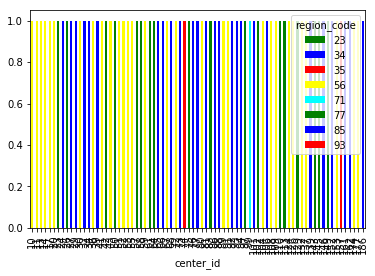

In [26]:
g1= pd.crosstab(fullfm['center_id'], fullfm['region_code'])
g1.plot(kind='bar', stacked=True, color=['green','blue','red','yellow','cyan'], grid=False)

In [28]:
#merge data to train data set  based on mealid
train_log=pd.merge(train,meal_info,on=['meal_id'],how='left')




In [29]:
train_log.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian


In [30]:
#merge data to train   based on center id 
train_log1=pd.merge(train_log,fullfm,on=['center_id'],how='left')


In [31]:
#merge data to test   based on meal id
test_log=pd.merge(test,meal_info,on=['meal_id'],how='left')



In [32]:
#merge data to test   based on center id
test_log1=pd.merge(test_log,fullfm,on=['center_id'],how='left')



In [33]:
train_log1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [34]:

train_log1.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

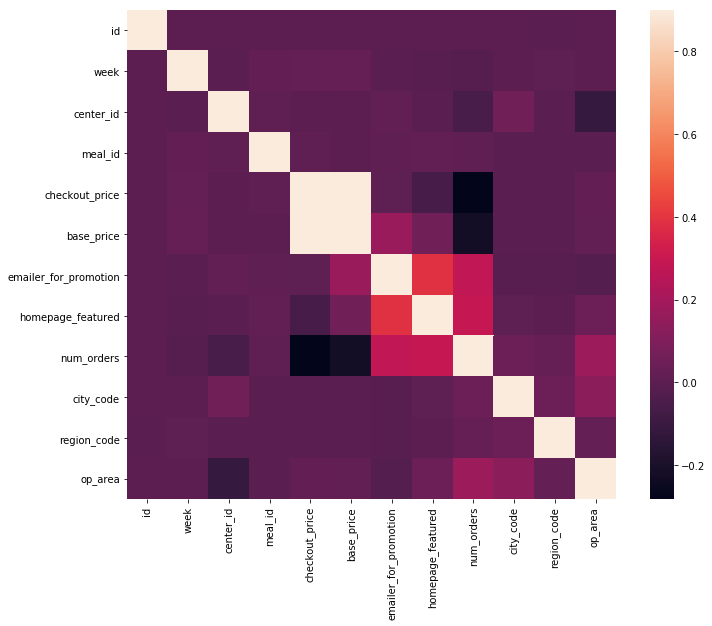

In [35]:
# corelation in numerical data
corrmat = train_log1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# categorical data  treament 

In [36]:
# categorical train data in to varible
mylist=list(train_log1.select_dtypes(include=['object']).columns)



In [37]:
# categorical test data in to varible
mylist1=list(test_log1.select_dtypes(include=['object']).columns)


In [38]:
# creating dummies to both train and test data set
dummies=pd.get_dummies(train_log1[mylist], prefix=mylist)
train_log1.drop(mylist, axis=1, inplace=True)

train_log1=pd.concat([train_log1,dummies], axis=1)

dummies1=pd.get_dummies(test_log1[mylist1], prefix=mylist1)
test_log1.drop(mylist1, axis=1, inplace=True)
test_log1=pd.concat([test_log1,dummies1], axis=1)

In [39]:
train_log1.head(10)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,1,0,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,...,0,0,0,0,0,0,1,0,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,...,0,0,0,0,0,0,1,0,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,...,0,0,0,0,1,0,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,...,0,0,0,0,1,0,0,0,0,1
5,1270037,1,55,1248,251.23,252.23,0,0,28,647,...,0,0,0,0,1,0,0,0,0,1
6,1191377,1,55,1778,183.36,184.36,0,0,190,647,...,0,0,0,0,0,1,0,0,0,1
7,1499955,1,55,1062,182.36,183.36,0,0,391,647,...,0,0,0,0,0,1,0,0,0,1
8,1025244,1,55,2707,193.06,192.06,0,0,472,647,...,0,0,0,0,0,1,0,0,0,1
9,1054194,1,55,1207,325.92,384.18,0,1,676,647,...,0,0,0,1,0,0,0,0,0,1


In [40]:
train_log1.shape

(456548, 33)

In [41]:
test_log1.shape

(32573, 32)

In [42]:
test_log1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,...,0,0,0,0,1,0,0,0,0,1
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,...,0,0,0,0,1,0,0,0,0,1


In [43]:
# fix target variable
Y=train_log1['num_orders']

In [44]:
a=test_log1['id']

In [45]:
X=train_log1.drop(['id'], axis=1)
test1=test_log1.drop(['id'], axis=1)

In [46]:
X=X.drop(['num_orders'], axis=1)

In [47]:
X.shape

(456548, 31)

In [48]:
test_log1.shape

(32573, 32)

# Model selection 

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30)

In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [51]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
pred=model.predict(x_test)

In [53]:
pred1=model.predict(test1)

In [54]:
def rmsle(y_test, pred):
    
    return np.sqrt(np.mean(np.square(np.log1p(x_train) - np.log1p(y_train))))

In [55]:
def rmsle(y_test, pred):
    
    return np.sqrt(np.mean(np.square(np.log1p(y_test) - np.log1p(pred))))

In [56]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_absolute_error



In [57]:
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())
my_pipeline.fit(x_train, y_train)

predic_t = my_pipeline.predict(x_test)


In [58]:
def rmsle(y_test, pred):
    
    return np.sqrt(np.mean(np.square(np.log1p(x_train) - np.log1p(y_train))))

In [59]:
def rmsle(y_test, pred):
    
    return np.sqrt(np.mean(np.square(np.log1p(y_test) - np.log1p(pred))))

In [60]:
predict2=my_pipeline.predict(test1)

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test,predic_t)

0.8453244522820229

In [62]:
model2 = tree.DecisionTreeClassifier(criterion='gini')
model2 = tree.DecisionTreeRegressor(max_depth=10)
model2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
pred2=model2.predict(x_test)

In [64]:
def rmsle(y_test, pred):
    
    return np.sqrt(np.mean(np.square(np.log1p(x_train) - np.log1p(y_train))))

In [65]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,predic_t)

0.2553828909100238

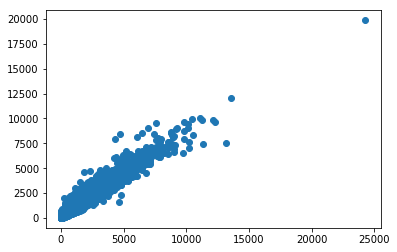

In [66]:

plt.scatter(y_train, my_pipeline.predict(x_train))

In [67]:
model2 = tree.DecisionTreeClassifier(criterion='gini')
model2 = tree.DecisionTreeRegressor(max_depth=10)
model2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [68]:
pred2=model2.predict(x_test)

In [69]:
def rmsle(y_test, pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_test) - np.log1p(pred))))

In [70]:
predicted=model2.predict(test1)

In [73]:
outdf=pd.DataFrame({"id":a,"num_orders":predict2})
outdf.to_csv("log_v.csv")

In [74]:
from IPython.display import HTML
import base64  

import pandas as pd  

def create_download_link(outdf , title = "Download CSV file", filename = "Rnadom forest.csv"):  
    csv = outdf.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(outdf)